In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from dataset import load_dataset, load_labels, split_data, format_labels
from features import time_series_features, fractal_features, entropy_features, hjorth_features, freq_band_features
import variables as v

In [3]:
data_type = "ica_filtered"
test_type = "Arithmetic"
dataset_ = load_dataset(data_type, test_type)
dataset_art = split_data(dataset_, v.SFREQ)
dataset_art

array([[[[ 1.08688279e+00, -4.12227850e+00, -2.63486816e+00, ...,
           9.19093627e-01, -2.93424901e+00, -4.62999629e+00],
         [ 9.86495959e-01,  2.69870395e+00,  6.46661250e+00, ...,
          -9.76412167e-01, -4.50023562e+00, -5.80526179e+00],
         [ 1.15106560e+00, -1.83085553e+00,  1.82949034e+00, ...,
           2.96202961e+00, -8.32663019e-01, -1.90629712e+00],
         ...,
         [ 5.52843535e-01, -8.14841200e-01,  1.64011833e+00, ...,
           8.17066853e-01, -3.18191693e+00, -3.91609655e+00],
         [ 1.68768225e-02, -5.62574359e-01,  4.70613094e-01, ...,
           2.36324883e+00, -3.18401396e+00, -4.43191084e+00],
         [ 3.11154089e-01, -5.60329806e+00, -4.54337933e+00, ...,
           2.89038292e+00, -2.40163387e+00, -5.18460407e+00]],

        [[-4.72152784e+00, -5.34239975e+00, -4.93838116e+00, ...,
          -2.81678478e+00, -1.62374450e+00,  1.11706643e+00],
         [-7.01429283e+00, -8.89412627e+00, -8.38241443e+00, ...,
          -2.74433028e

In [4]:
data_type = "ica_filtered"
test_type = "Mirror"
dataset_ = load_dataset(data_type, test_type)
dataset_mir = split_data(dataset_, v.SFREQ)
dataset_mir

array([[[[-4.76921846e+00, -2.85384850e+00, -1.17364111e+00, ...,
           5.44317610e+00,  3.70619245e+00,  1.85319458e+00],
         [-4.77426344e+00, -2.43983400e+00, -5.80970417e-01, ...,
           2.69927426e+00,  2.03354645e+00,  1.45425049e+00],
         [-1.76196105e+00, -6.15118470e-01,  2.56342314e-01, ...,
           6.34875121e-02,  4.97791888e-02,  5.67796319e-02],
         ...,
         [-4.31721370e+00, -1.75594031e+00,  2.48553726e-01, ...,
           3.32258677e+00,  3.10186608e+00,  2.90420124e+00],
         [-8.56162903e+00, -5.65951694e+00, -3.30455921e+00, ...,
           3.68623514e+00,  3.72299596e+00,  3.86228698e+00],
         [-6.06929531e+00, -3.32344900e+00, -1.05311061e+00, ...,
           6.31230790e+00,  5.61368586e+00,  4.72581237e+00]],

        [[-2.98969383e-01, -2.10218192e+00, -2.68639270e+00, ...,
          -5.02135475e+00, -5.56520827e+00, -5.41353464e+00],
         [ 5.25238168e-01, -4.57287244e-01, -5.87512418e-01, ...,
          -3.78161686e

In [5]:
data_type = "ica_filtered"
test_type = "Stroop"
dataset_ = load_dataset(data_type, test_type)
dataset_st = split_data(dataset_, v.SFREQ)
dataset_st.shape

(120, 25, 32, 128)

In [6]:
dataset = np.concatenate([dataset_art, dataset_mir, dataset_st], axis=0)
dataset.shape

(360, 25, 32, 128)

In [7]:
dataset

array([[[[ 1.08688279e+00, -4.12227850e+00, -2.63486816e+00, ...,
           9.19093627e-01, -2.93424901e+00, -4.62999629e+00],
         [ 9.86495959e-01,  2.69870395e+00,  6.46661250e+00, ...,
          -9.76412167e-01, -4.50023562e+00, -5.80526179e+00],
         [ 1.15106560e+00, -1.83085553e+00,  1.82949034e+00, ...,
           2.96202961e+00, -8.32663019e-01, -1.90629712e+00],
         ...,
         [ 5.52843535e-01, -8.14841200e-01,  1.64011833e+00, ...,
           8.17066853e-01, -3.18191693e+00, -3.91609655e+00],
         [ 1.68768225e-02, -5.62574359e-01,  4.70613094e-01, ...,
           2.36324883e+00, -3.18401396e+00, -4.43191084e+00],
         [ 3.11154089e-01, -5.60329806e+00, -4.54337933e+00, ...,
           2.89038292e+00, -2.40163387e+00, -5.18460407e+00]],

        [[-4.72152784e+00, -5.34239975e+00, -4.93838116e+00, ...,
          -2.81678478e+00, -1.62374450e+00,  1.11706643e+00],
         [-7.01429283e+00, -8.89412627e+00, -8.38241443e+00, ...,
          -2.74433028e

In [8]:
label_a = load_labels()
labela = format_labels(label_a, test_type="Arithmetic", epochs=dataset.shape[1])
n_trials, n_secs = dataset_art.shape[0], dataset_art.shape[1]
labels_art = np.repeat(labela, n_secs)  # Adjust according to your labels
# Reshape `labels` by averaging every 25 samples to create 3000 labels
labels_art = labels_art.reshape(-1, 25).mean(axis=1)
labels_art[1:50]

array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

In [9]:
label_m = load_labels()
labelm = format_labels(label_m, test_type="Mirror", epochs=dataset.shape[1])
n_trials, n_secs = dataset_mir.shape[0], dataset_mir.shape[1]
labels_mir = np.repeat(labelm, n_secs)  # Adjust according to your labels
# Reshape `labels` by averaging every 25 samples to create 3000 labels
labels_mir = labels_mir.reshape(-1, 25).mean(axis=1)
labels_mir[1:50]

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.])

In [10]:
label_s = load_labels()
labelst = format_labels(label_s, test_type="Stroop", epochs=dataset.shape[1])
n_trials, n_secs = dataset_st.shape[0], dataset_st.shape[1]
labels_st = np.repeat(labelst, n_secs)  # Adjust according to your labels
# Reshape `labels` by averaging every 25 samples to create 3000 labels
labels_st = labels_st.reshape(-1, 25).mean(axis=1)
labels_st[1:50]

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])

In [30]:
labels = np.concatenate([labels_art, labels_mir, labels_st], axis=0)
labels

array([6., 6., 6., ..., 3., 3., 3.])

In [46]:
time_features = time_series_features(dataset)

In [54]:
time_features.shape

(9000, 96)

In [48]:
freq_bands = np.array([1, 4, 8, 12,30, 50])
freq_features = freq_band_features(dataset, freq_bands)

In [53]:
freq_features.shape

(9000, 160)

In [50]:
hjorth_feature = hjorth_features(dataset)

In [52]:
hjorth_feature.shape

(9000, 64)

In [55]:
fractal_feature = fractal_features(dataset)

In [70]:
fractal_feature.shape

(9000, 64)

In [57]:
entropy_feature = entropy_features(dataset)

In [58]:
entropy_feature.shape

(9000, 128)

In [59]:
combined_features = np.concatenate((time_features, freq_features, hjorth_feature, fractal_feature, entropy_feature), axis=1)
print(combined_features.shape)
combined_features

(9000, 512)


array([[ 79.3357879 ,  46.18913798,  22.65282903, ...,   2.88117193,
          2.90748041,   2.83288615],
       [ 46.59072247,  29.34403515,  18.74444403, ...,   2.98242857,
          2.97938207,   2.96815658],
       [143.361387  ,  93.79113695,  43.3627468 , ...,   2.80080701,
          2.87452174,   2.81284434],
       ...,
       [  6.97803694,  10.44030033,  24.33888743, ...,   2.4477217 ,
          2.59680275,   2.54380149],
       [  4.65780081,  18.62471058,  22.03644015, ...,   2.37977739,
          2.43719075,   2.61238566],
       [  4.81780295,  26.89259064,  55.17988515, ...,   2.3559869 ,
          2.38500927,   2.43064229]])

In [60]:
# Parameters
n_trials = dataset.shape[0] * dataset.shape[1]  # Assuming data is the input to the feature functions
n_channels = dataset.shape[2]
time_series_feature_names = ['Variance', 'RMS', 'Peak-to-Peak Amplitude']
freq_band_feature_names = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
hjorth_feature_names = ['Hjorth Mobility', 'Hjorth Complexity']
fractal_feature_names = ['Higuchi FD', 'Katz FD']
entropy_feature_names = ['Approx Entropy', 'Sample Entropy', 'Spectral Entropy', 'SVD Entropy']

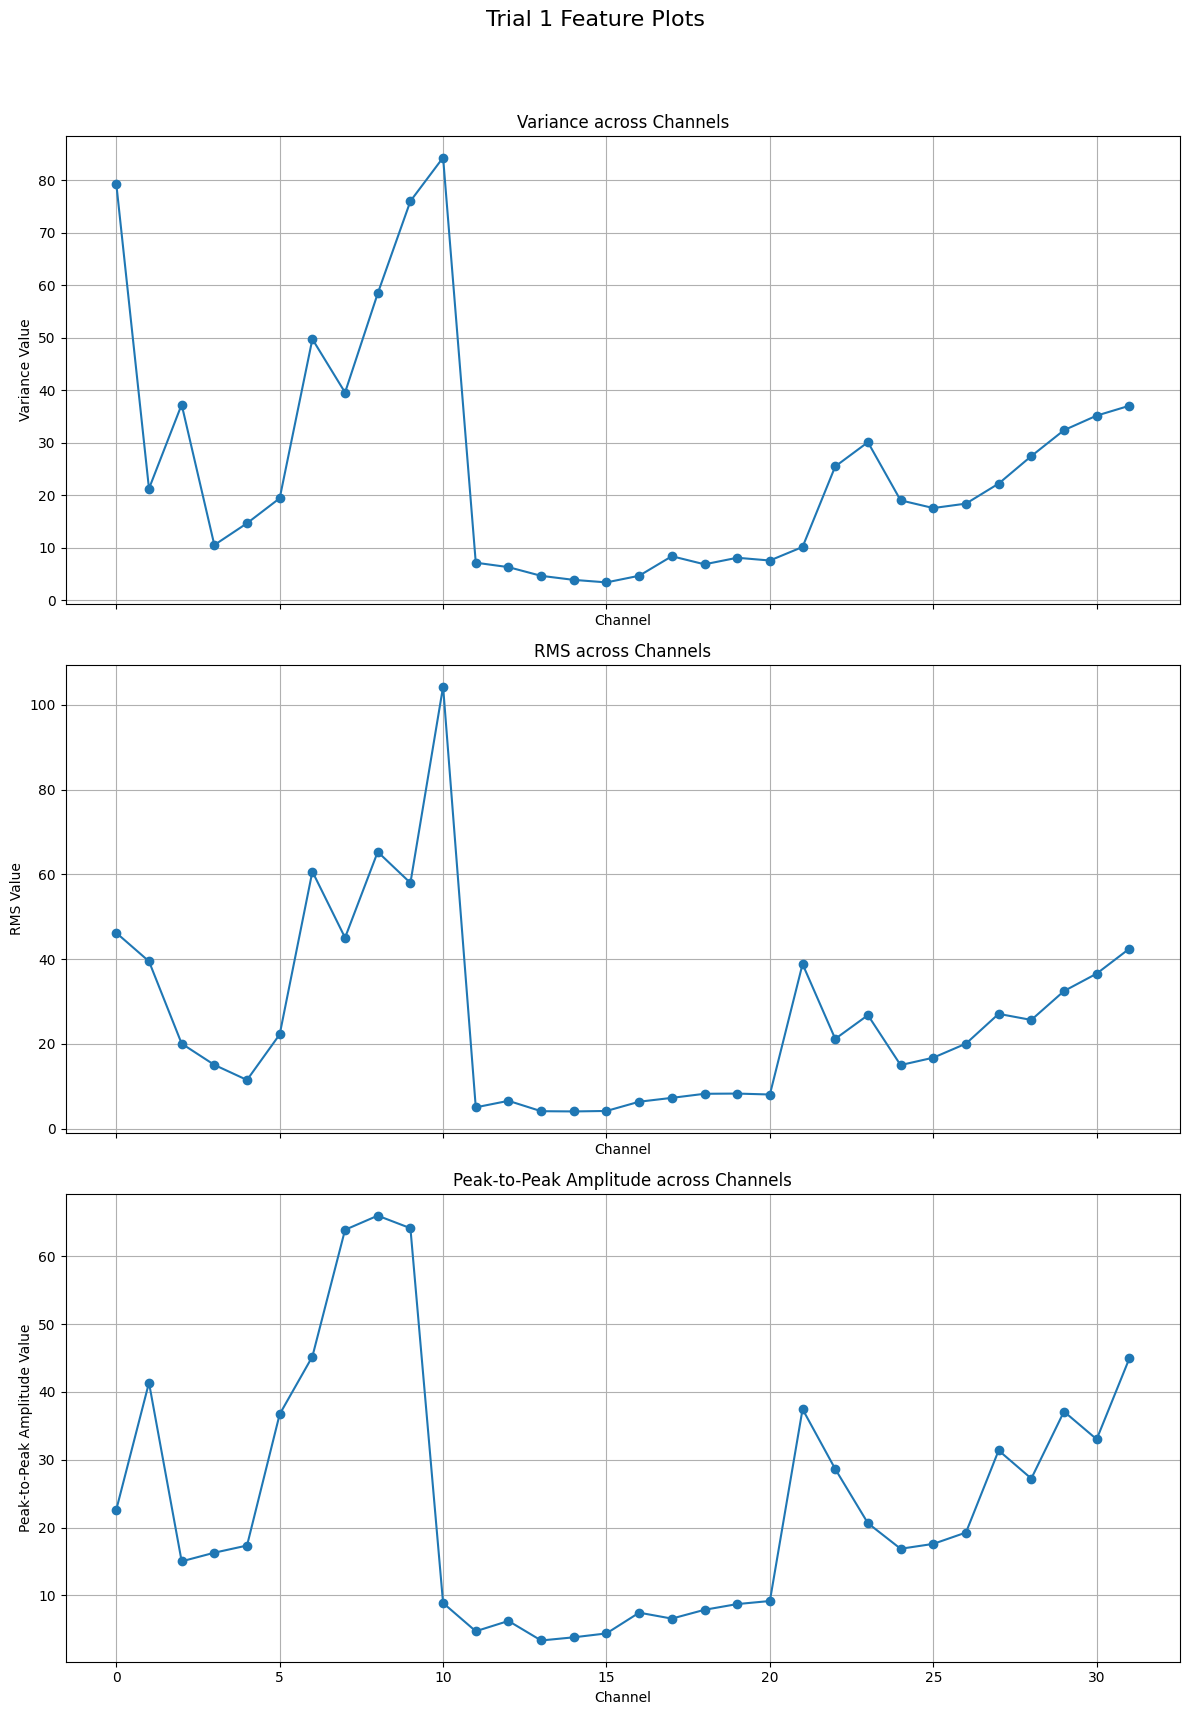

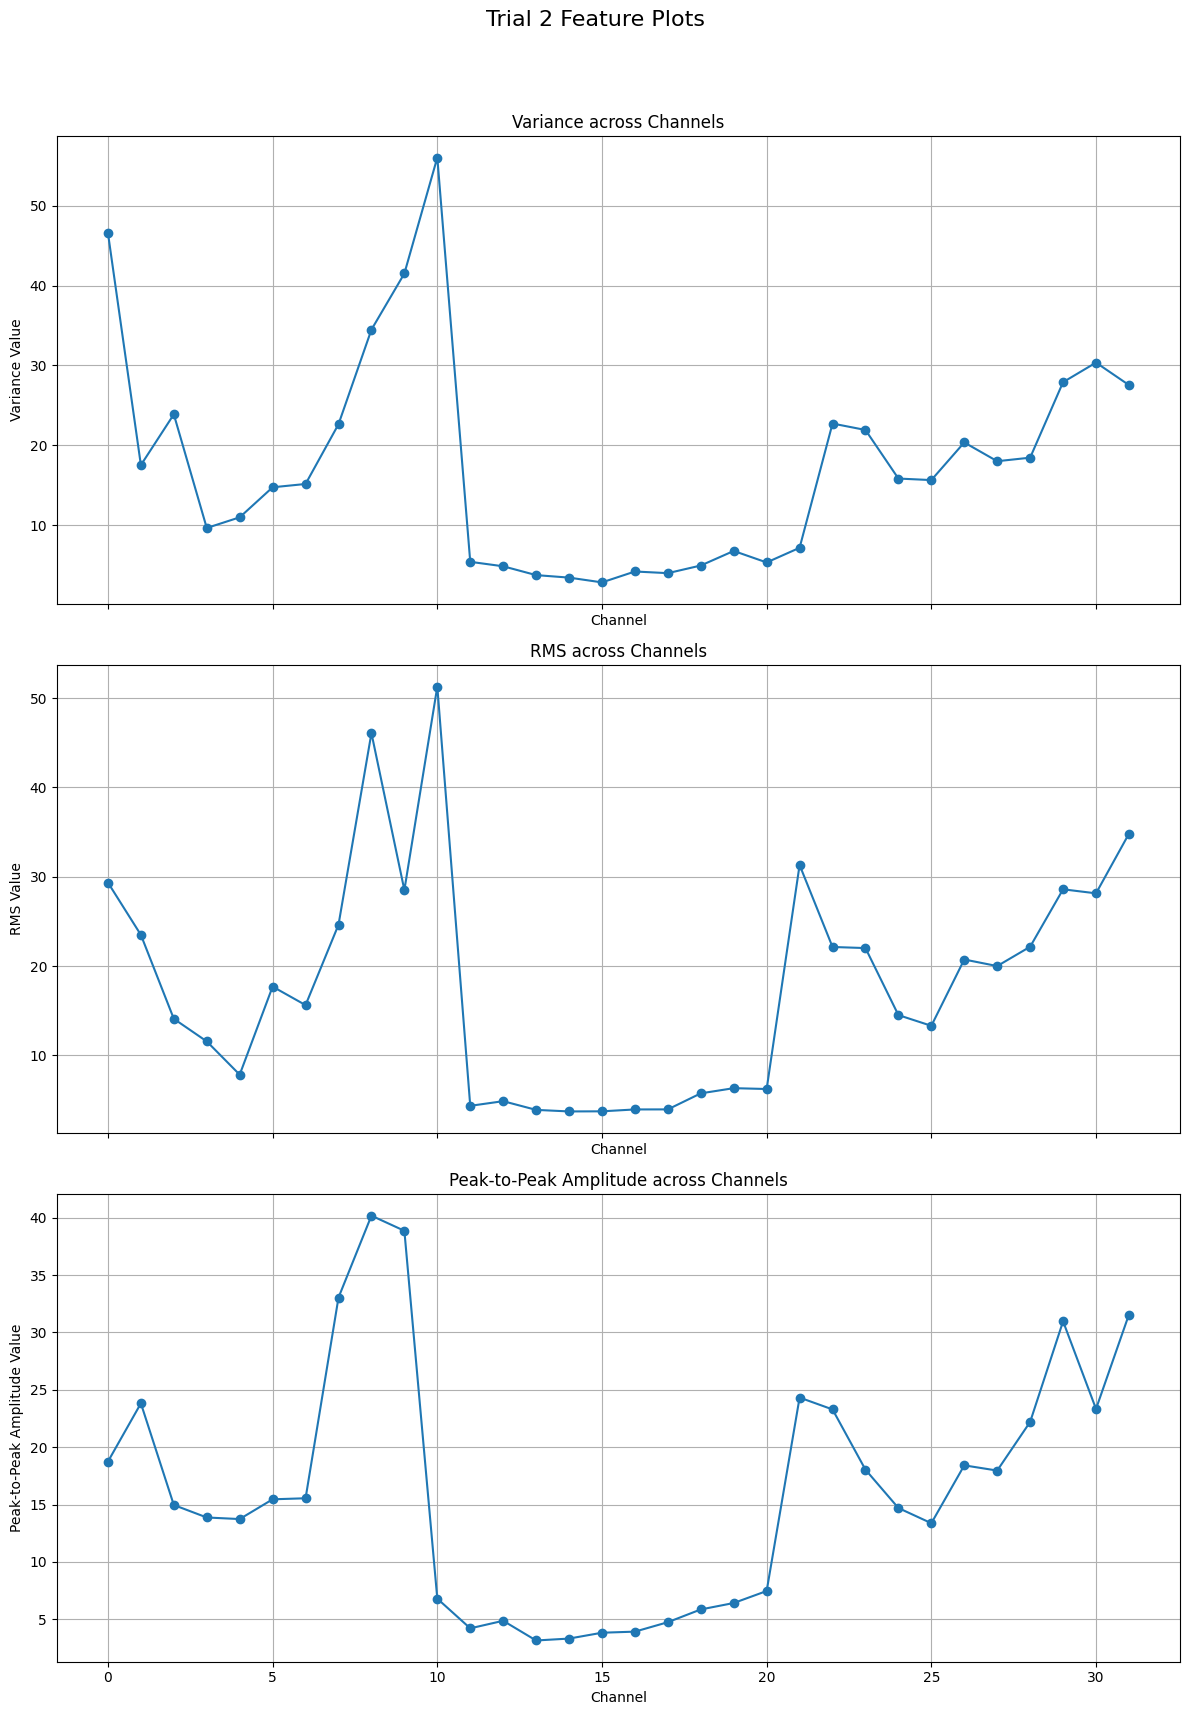

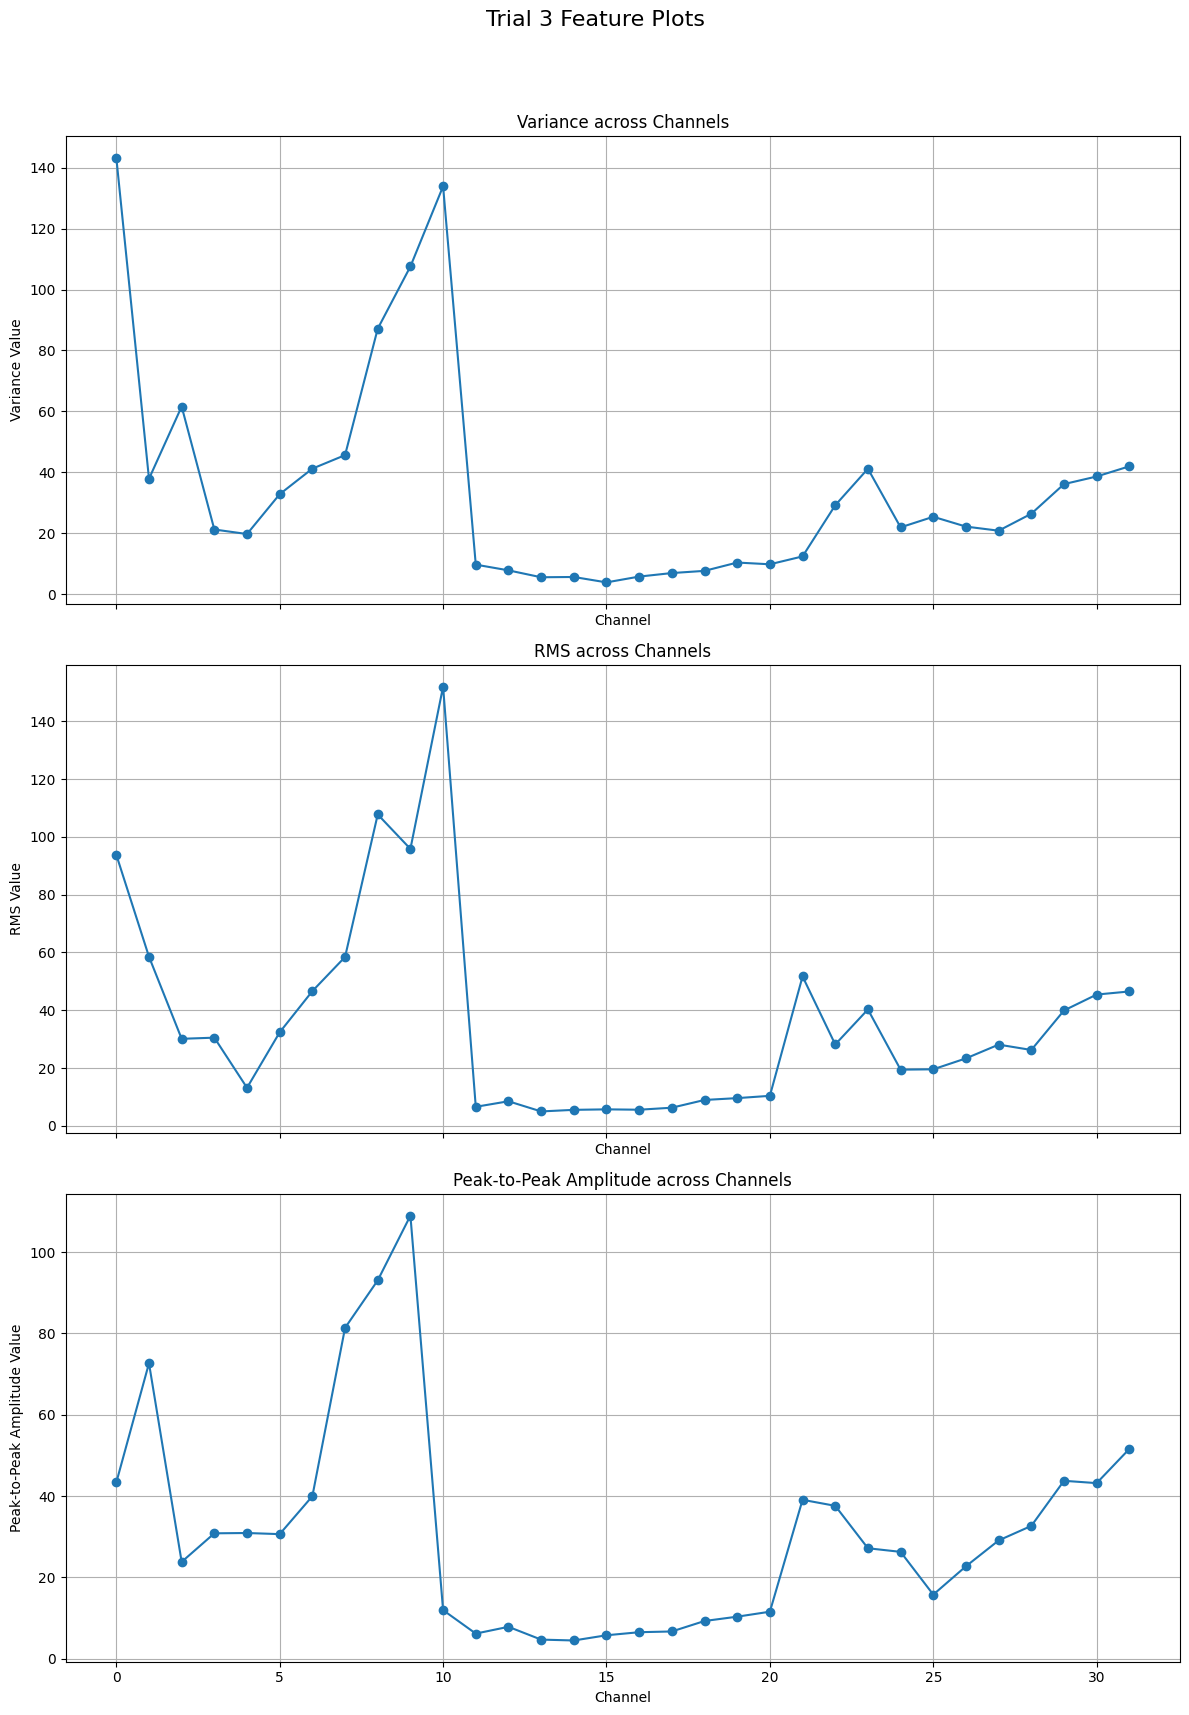

In [61]:
# Example usage
plot_extracted_features(
    time_features, 
    time_series_feature_names, 
    n_trials=time_features.shape[0] // n_channels, 
    n_channels=n_channels, 
    features_per_channel=len(time_series_feature_names), 
    max_trials_to_display=3  # Specify max trials to display
)

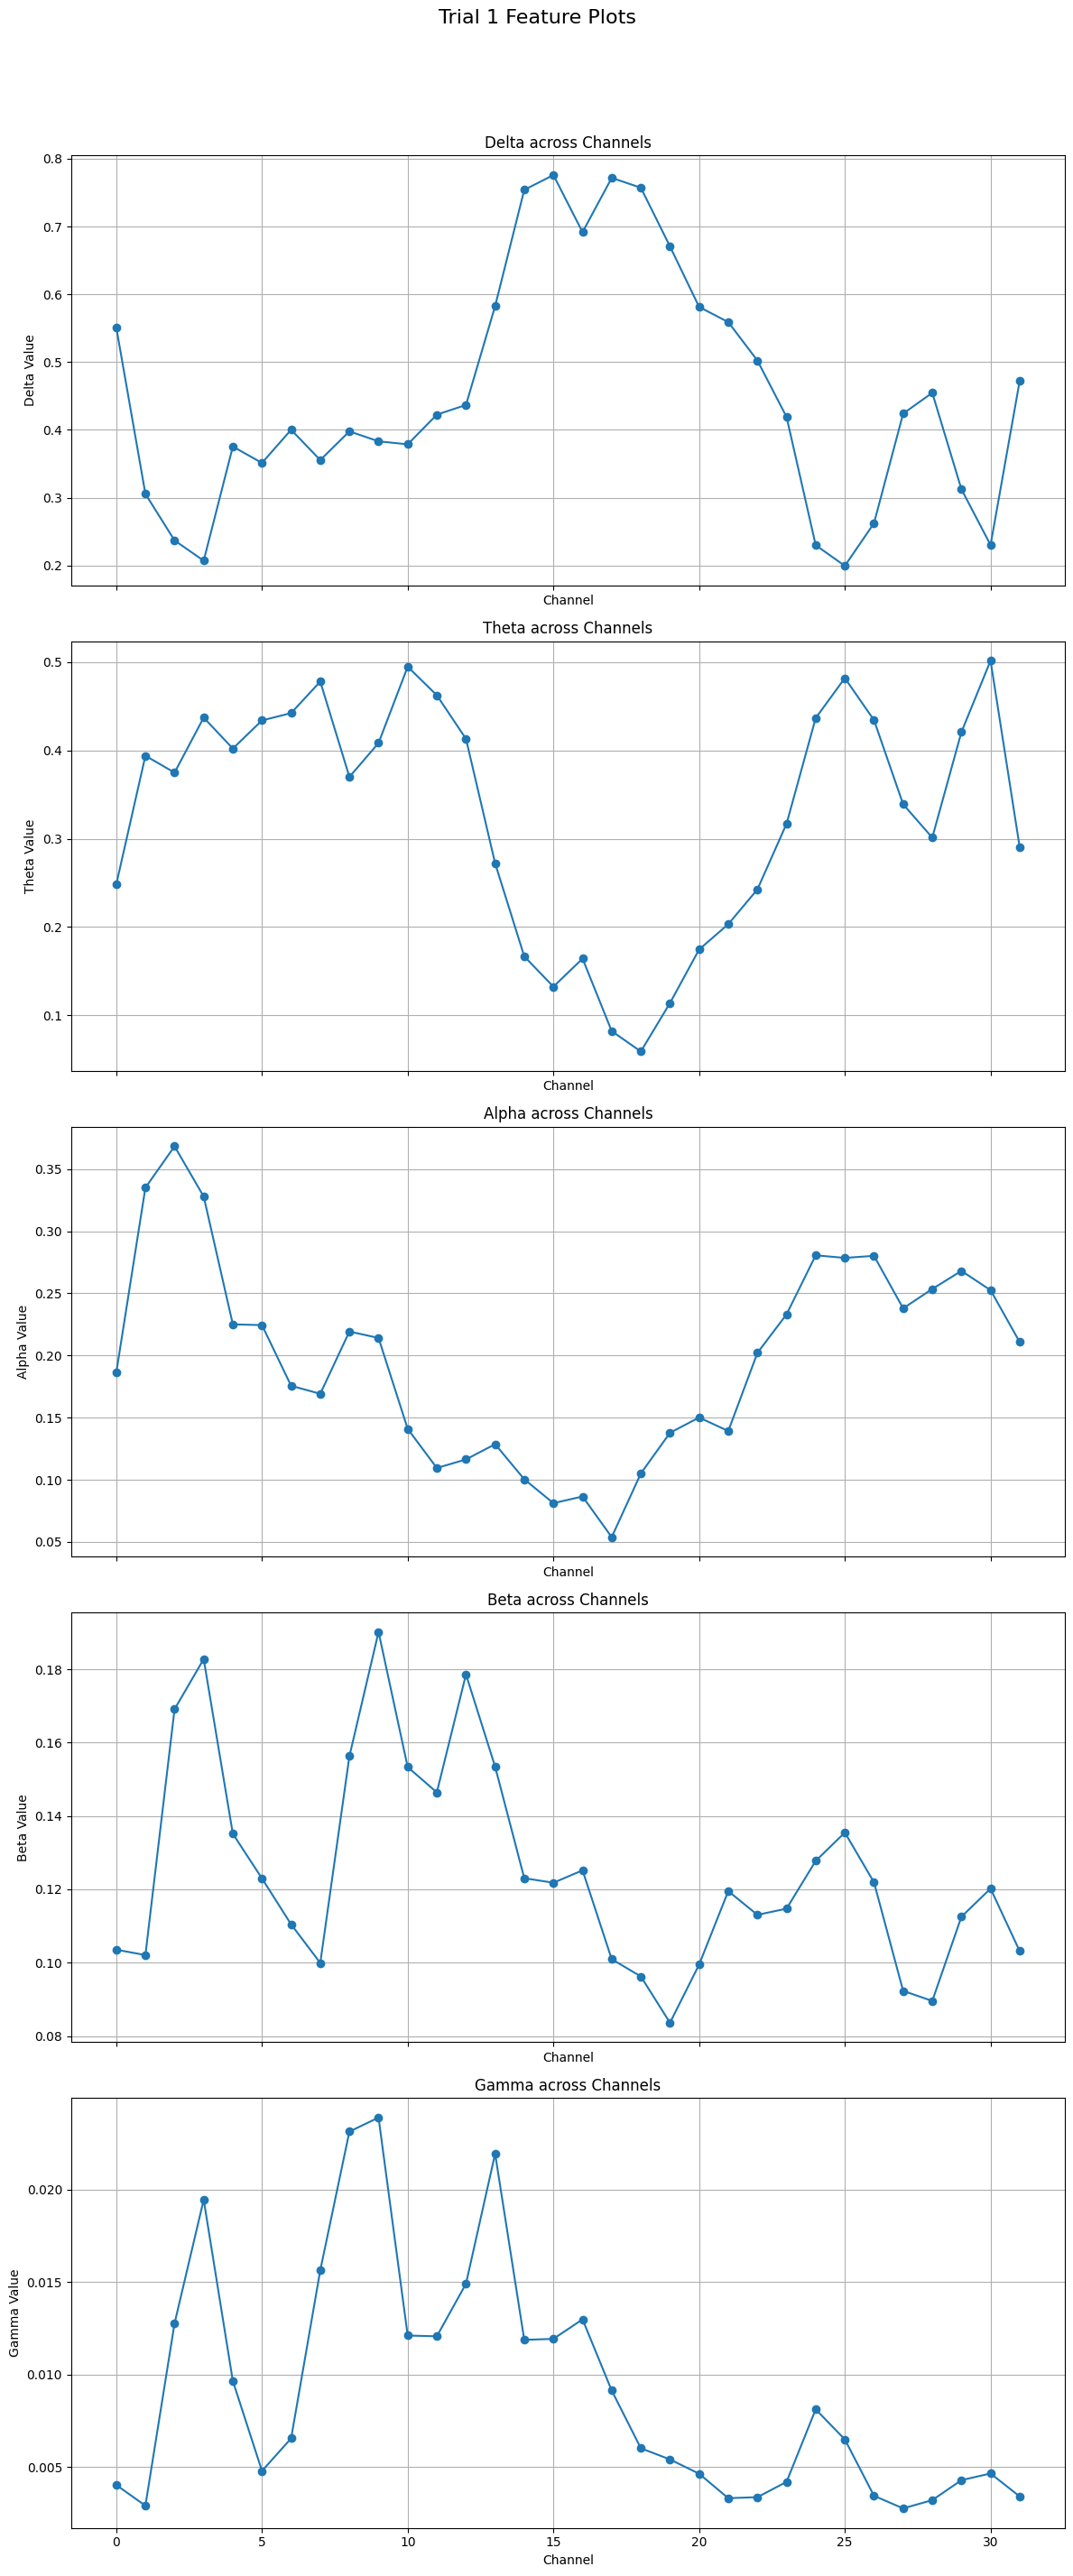

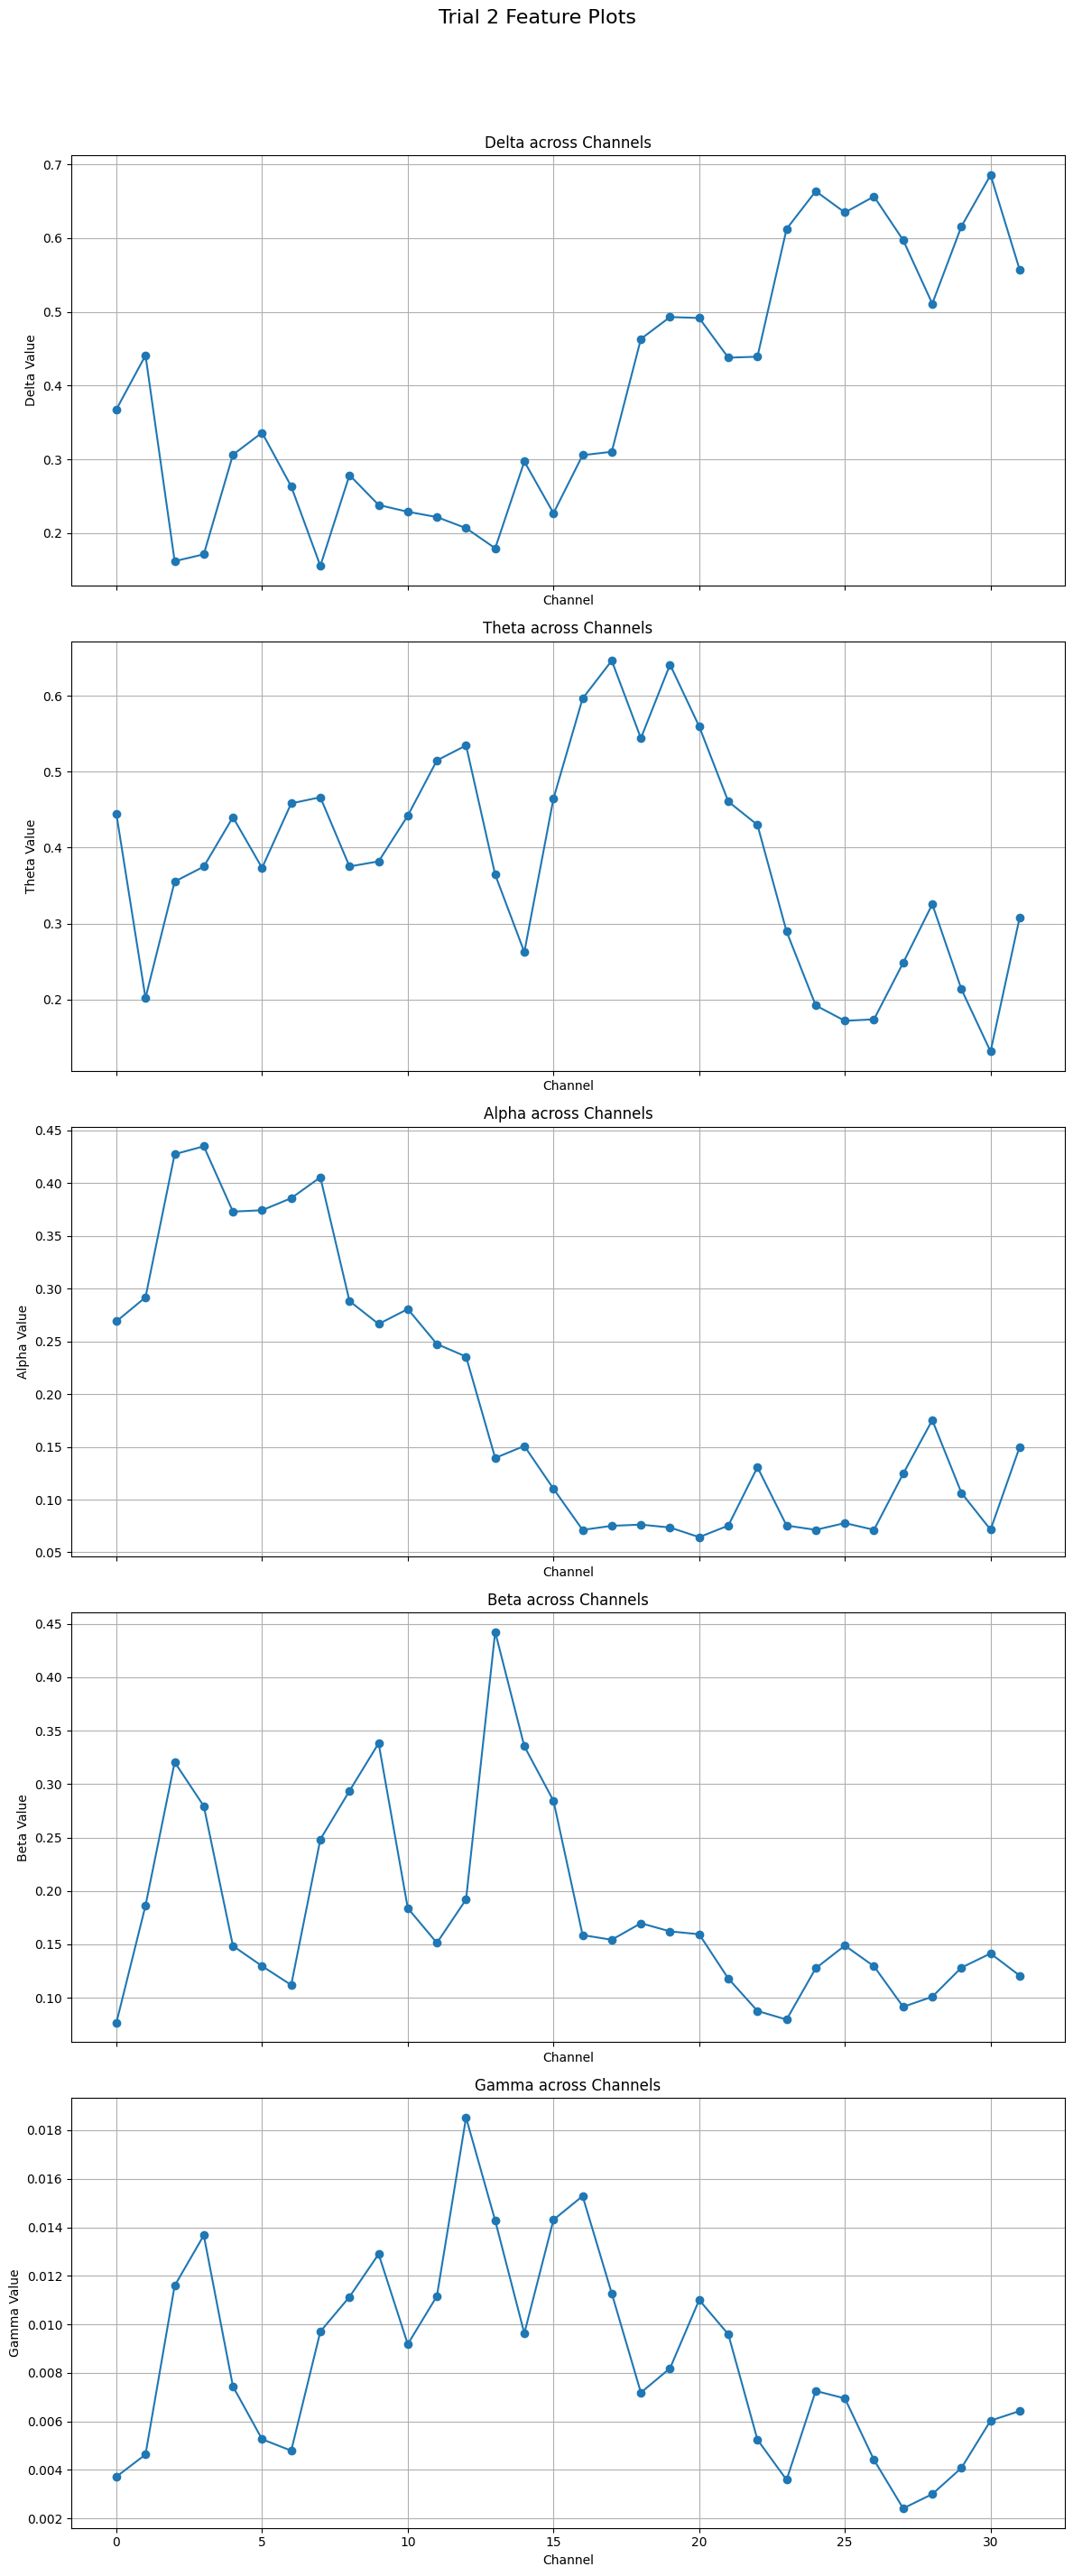

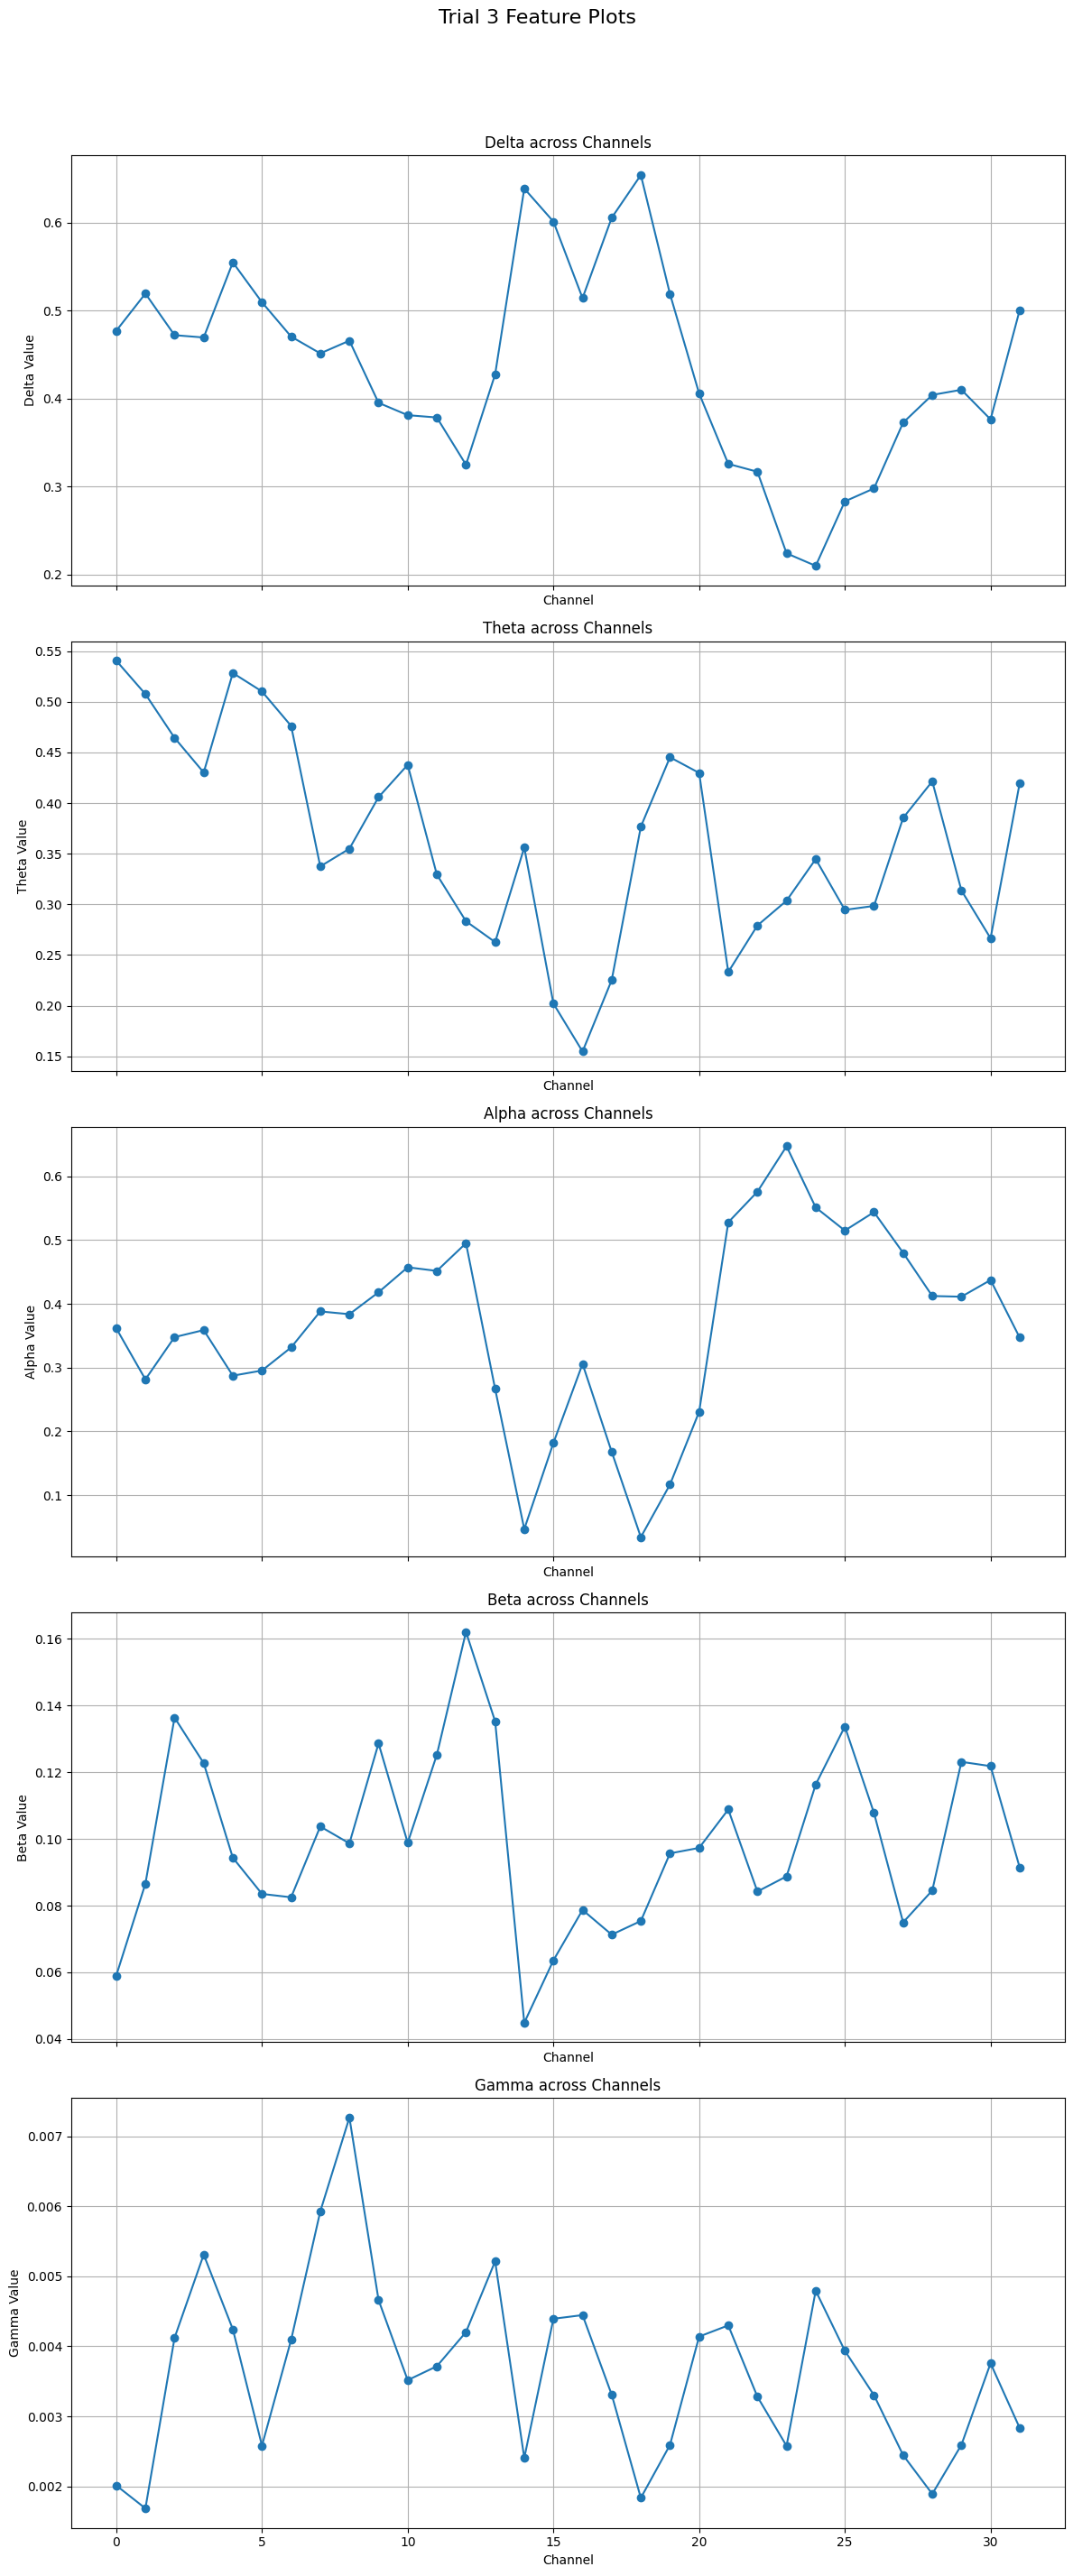

In [64]:
plot_extracted_features(
    freq_features, 
    freq_band_feature_names, 
    n_trials=freq_features.shape[0] // n_channels, 
    n_channels=n_channels, 
    features_per_channel=len(freq_band_feature_names), 
    max_trials_to_display=3  # Specify max trials to display
)

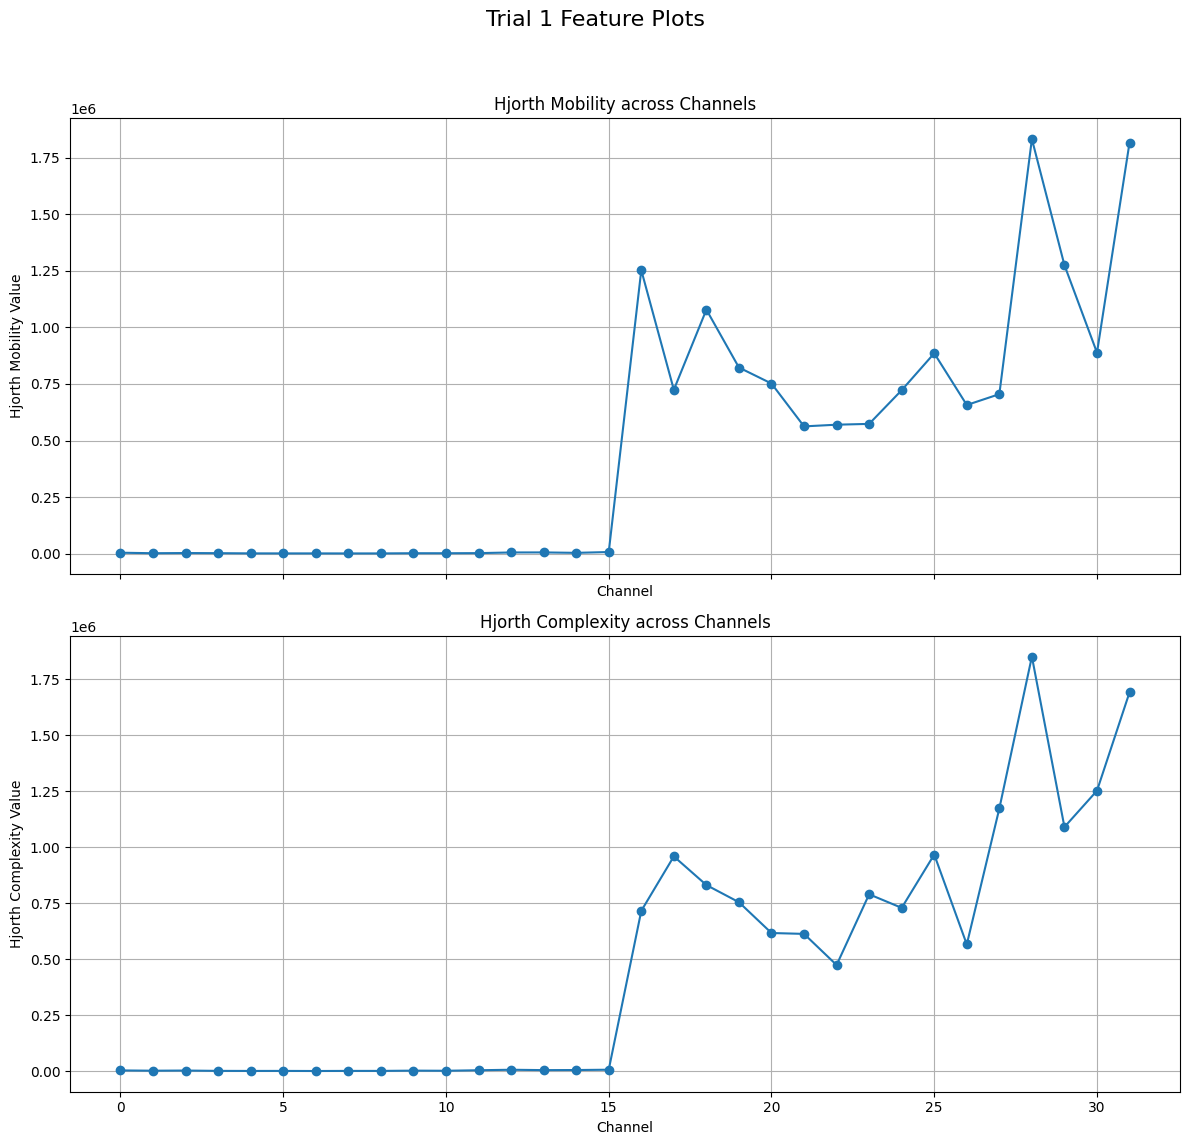

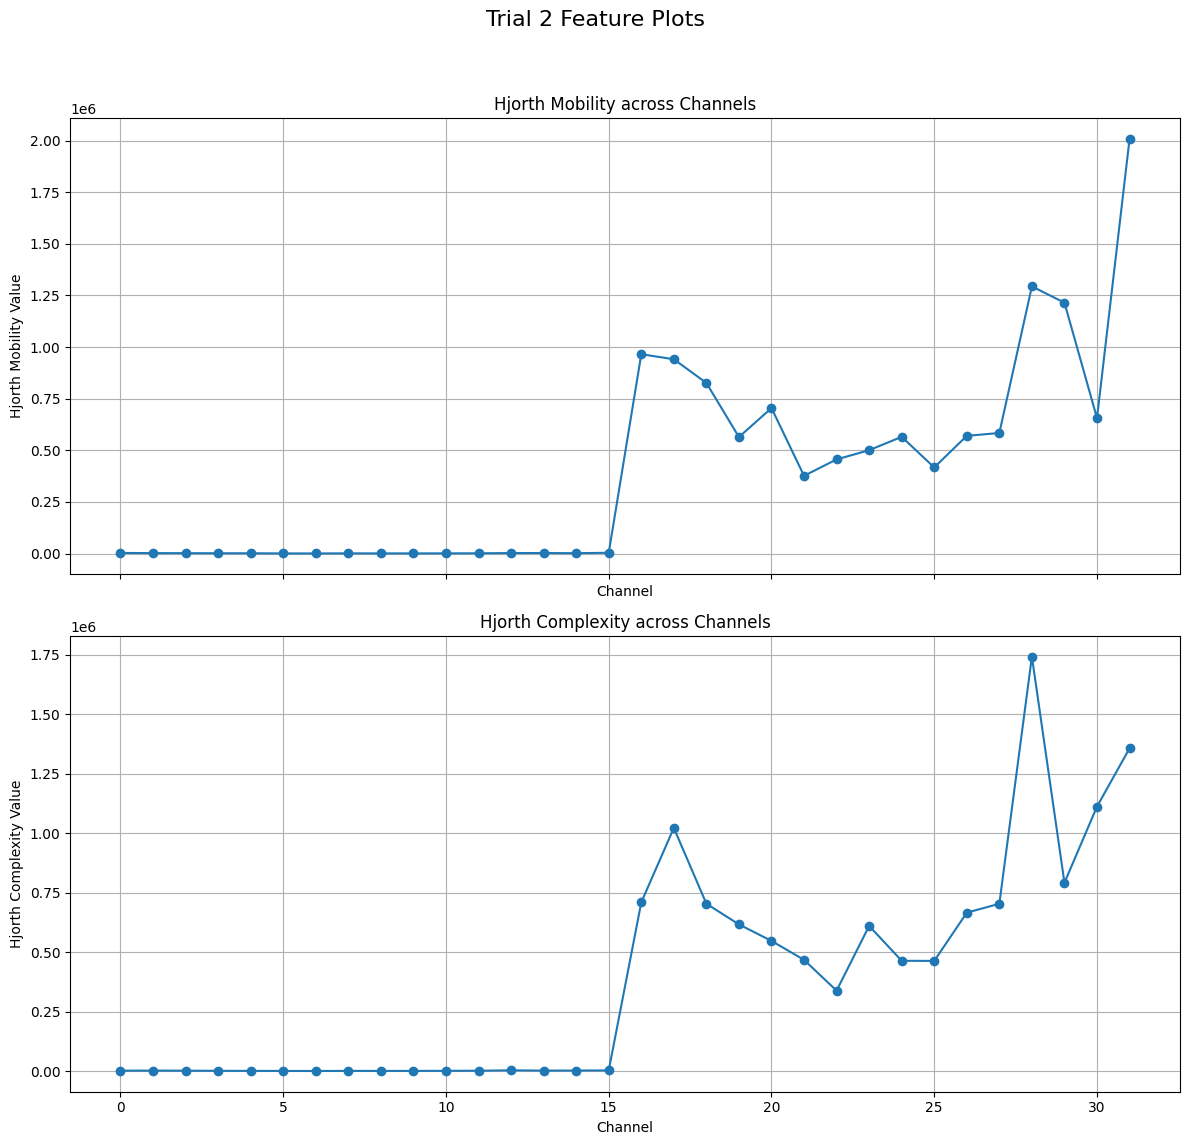

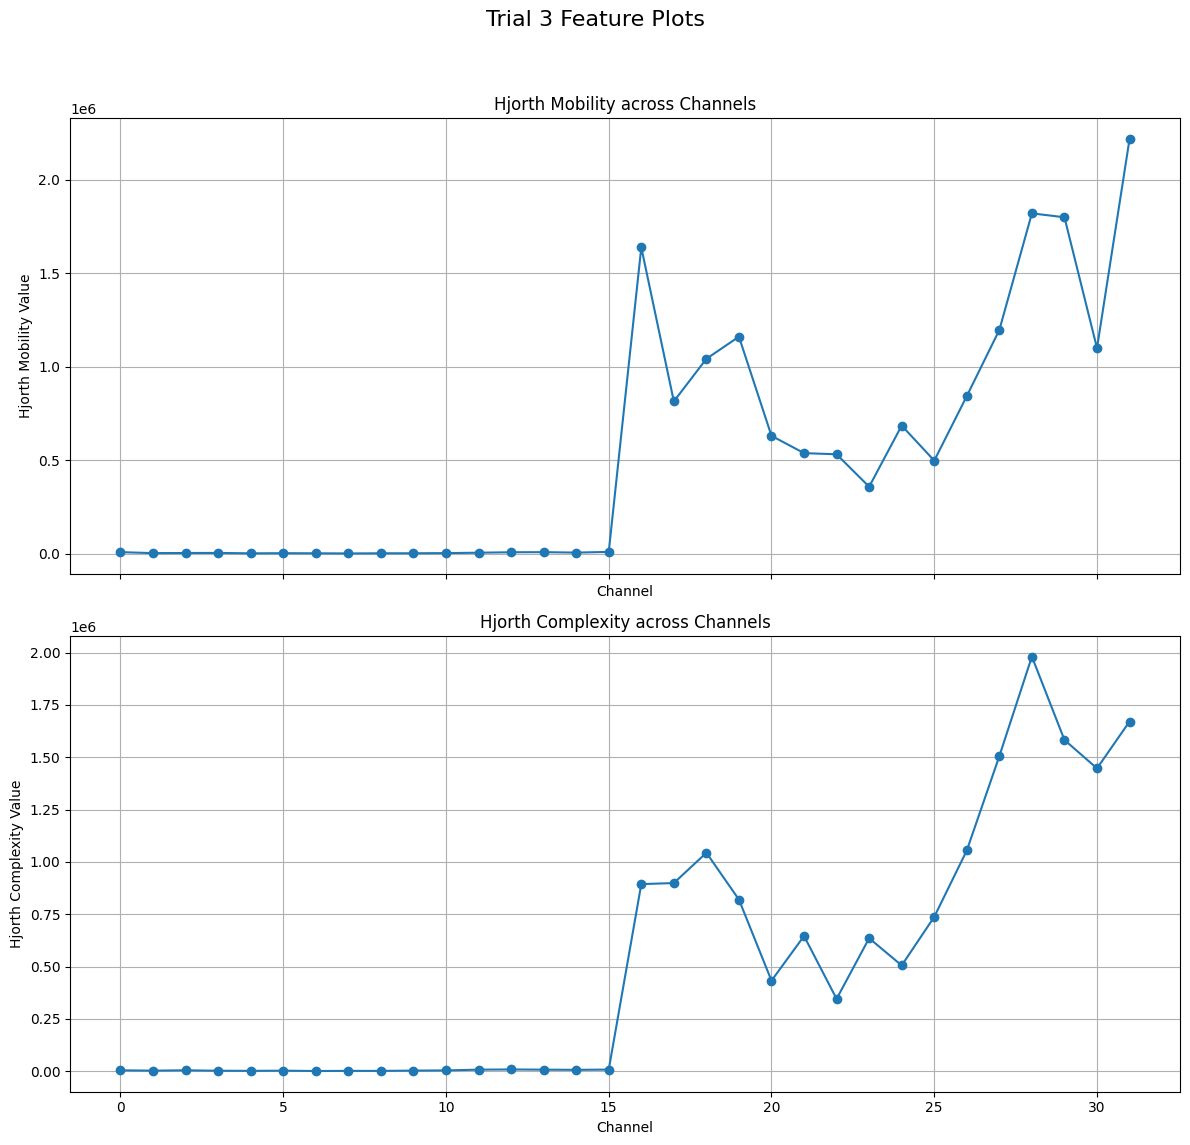

In [65]:
plot_extracted_features(
    hjorth_feature, 
    hjorth_feature_names, 
    n_trials=hjorth_feature.shape[0] // n_channels, 
    n_channels=n_channels,
    features_per_channel=len(fractal_feature_names), 
    max_trials_to_display=3  # Specify max trials to display
)

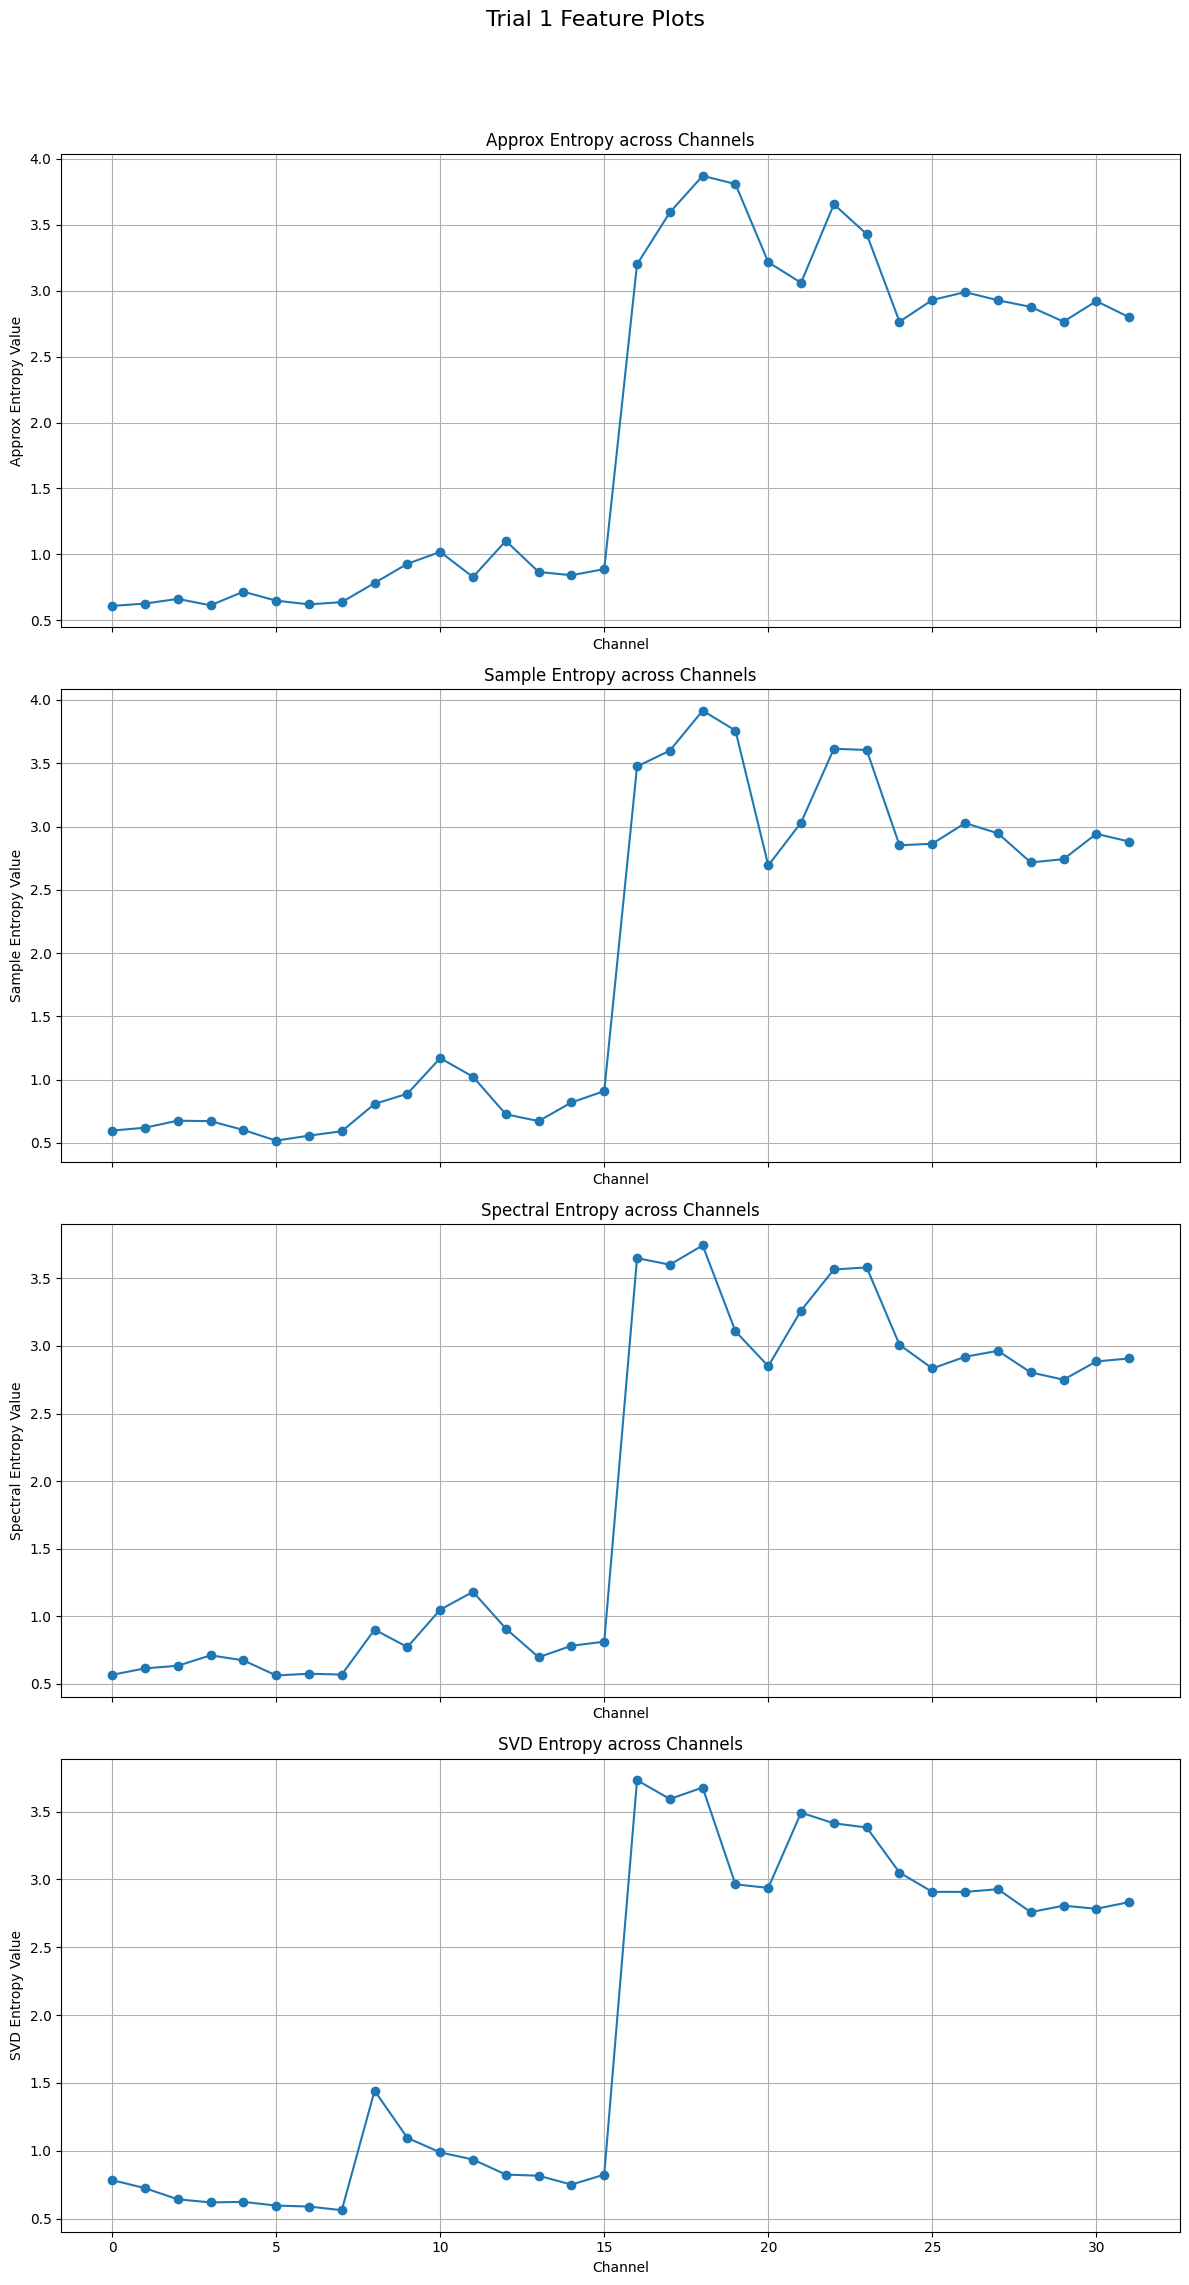

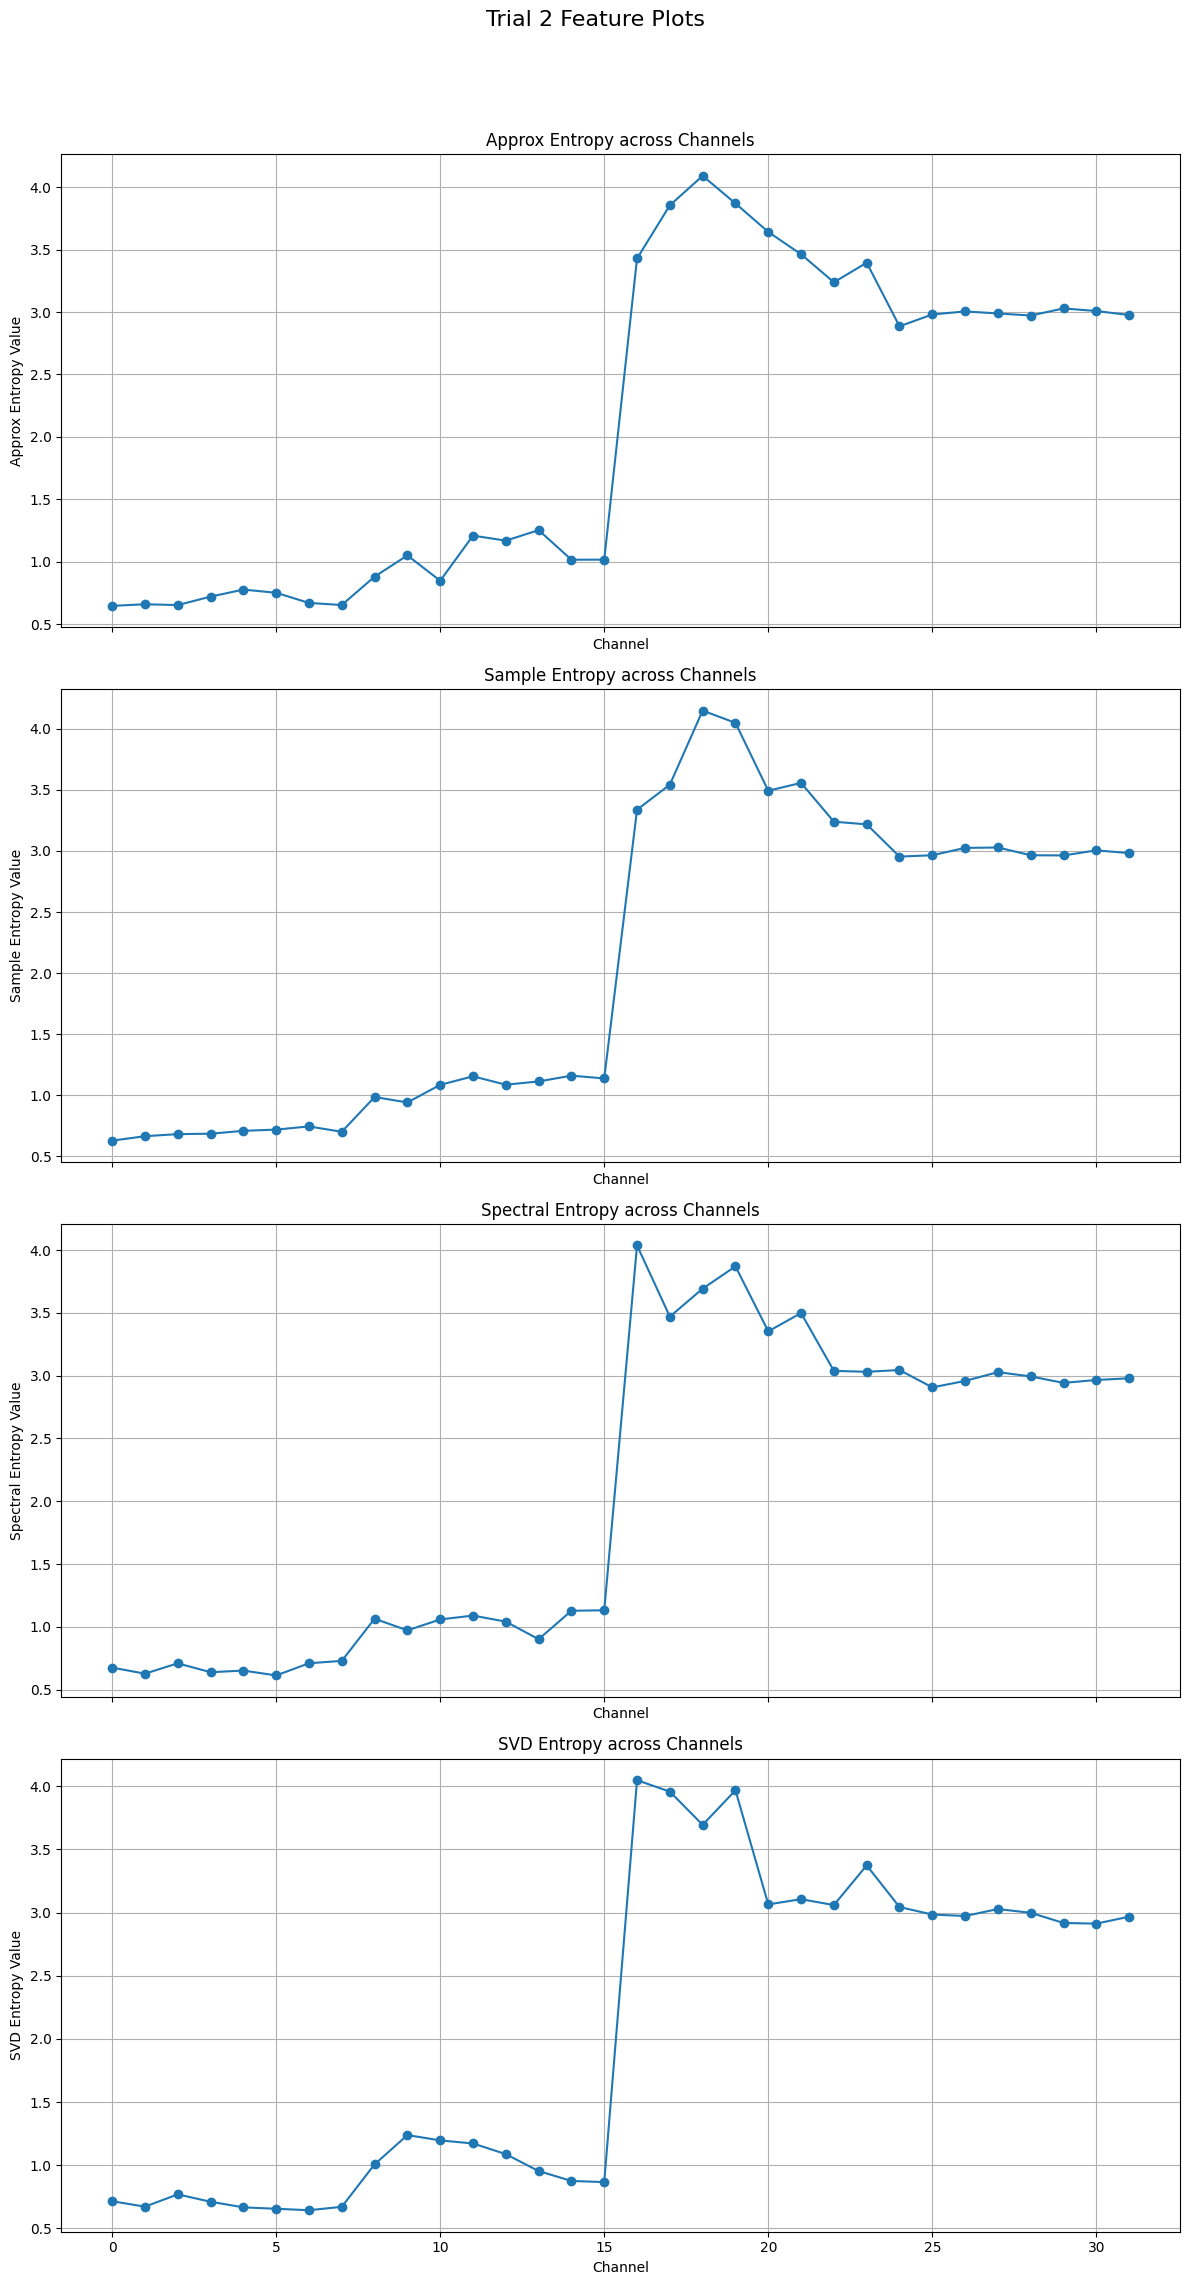

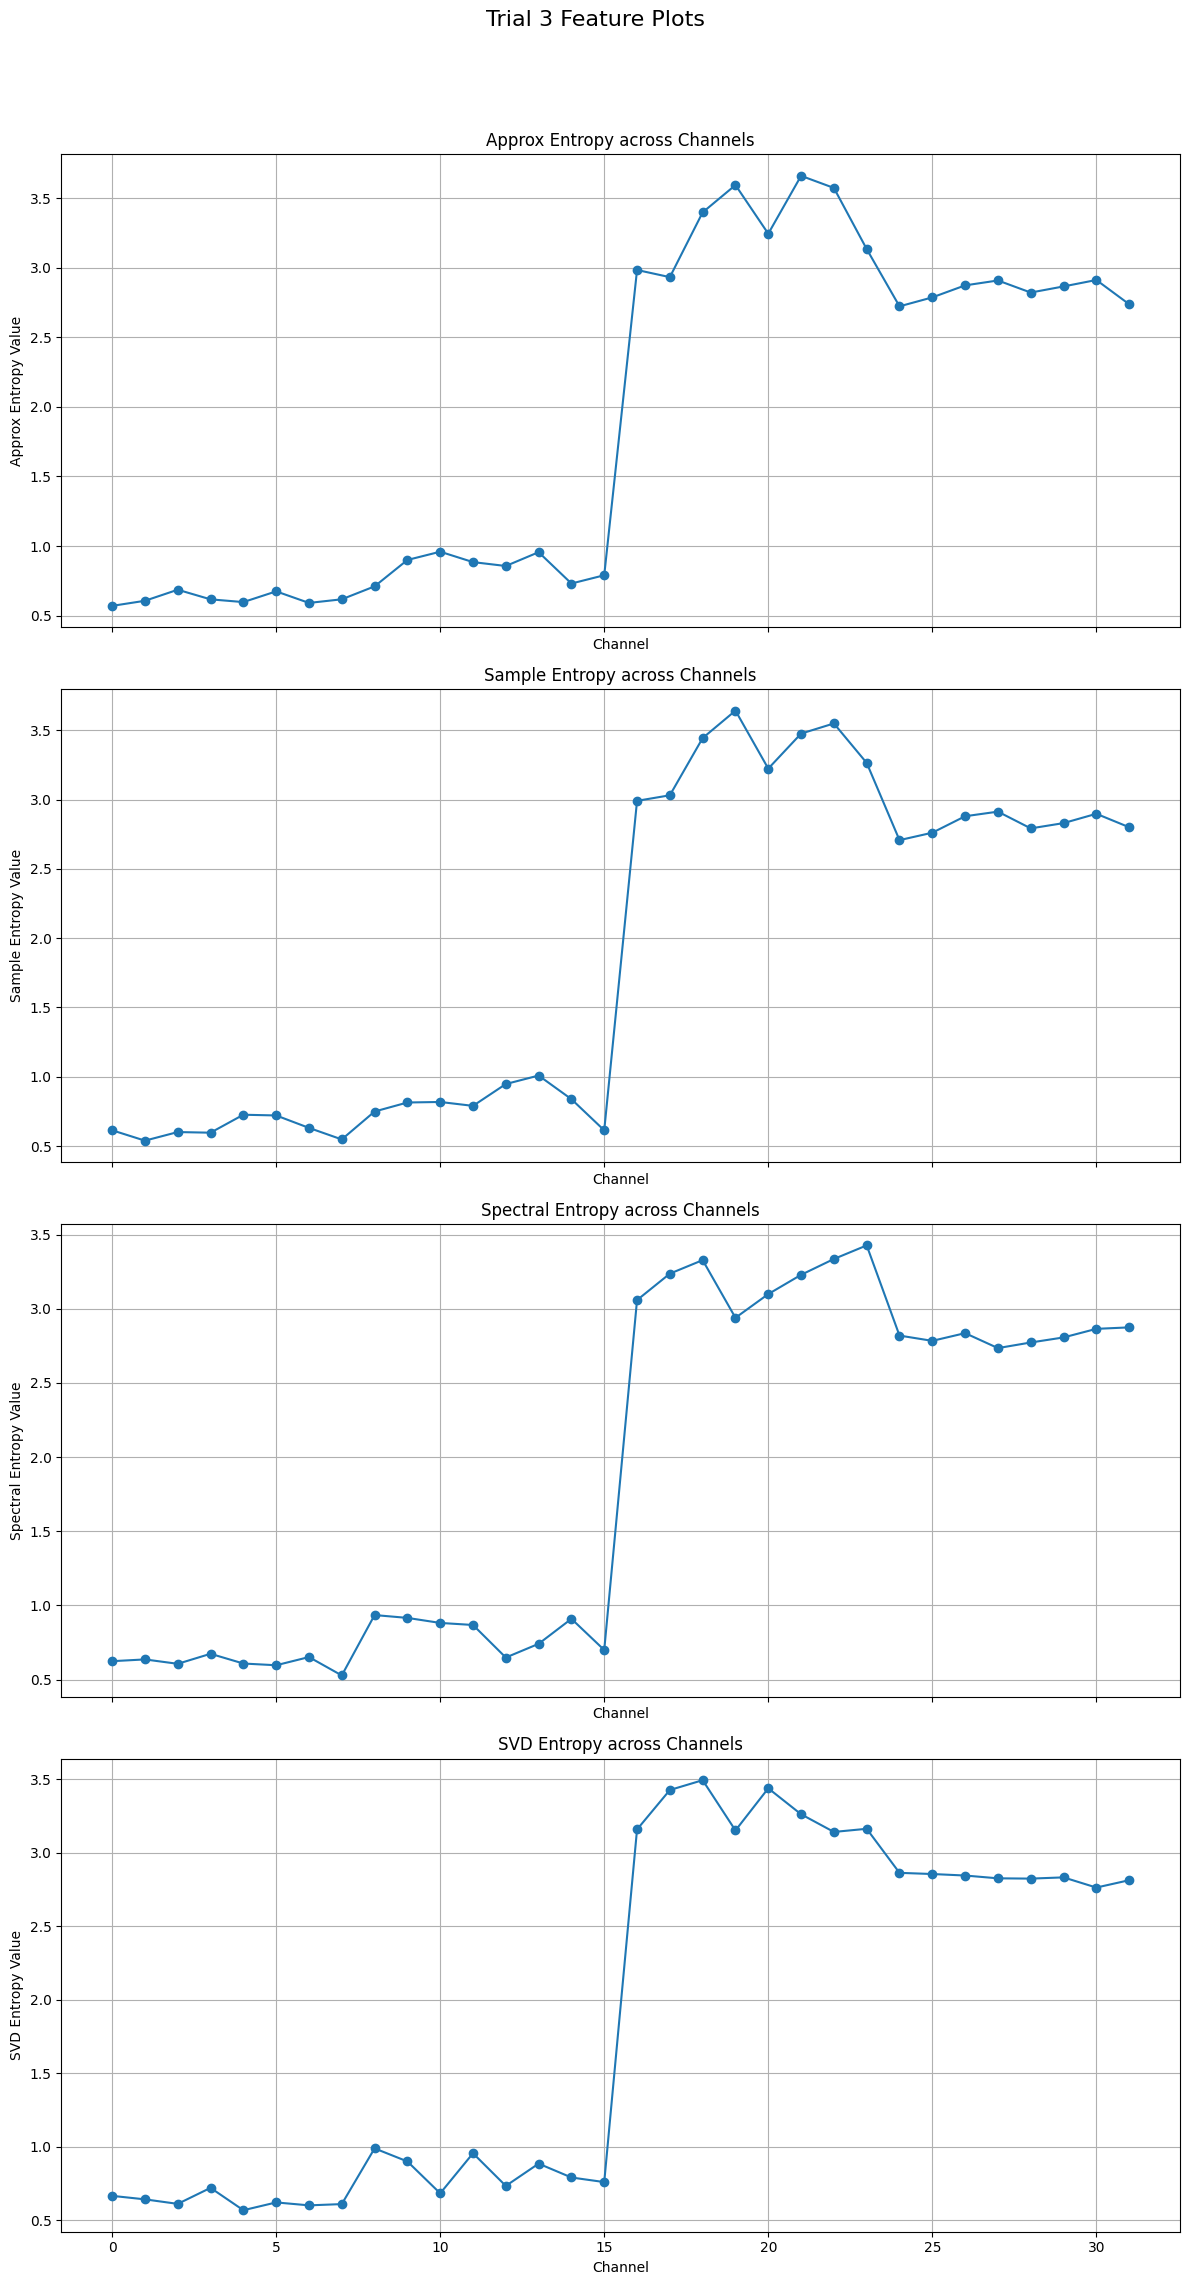

In [71]:
plot_extracted_features(
    entropy_feature, 
    entropy_feature_names, 
    n_trials=entropy_feature.shape[0] // n_channels, 
    n_channels=n_channels, 
    features_per_channel=len(entropy_feature_names), 
    max_trials_to_display=3  # Specify max trials to display
)

In [16]:
from sklearn.preprocessing import OneHotEncoder
l = labels.reshape((-1, 1))
enc = OneHotEncoder(sparse_output=False)
new = enc.fit_transform(l)

In [17]:
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Assuming inputs (3000, 512) and labels (3000, 10) are already loaded
# inputs: 2D array (3000, 512)
# labels: 2D one-hot encoded array (3000, 10)

# Decode one-hot encoded labels to categorical for classical ML models
y_categorical = np.argmax(new, axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(combined_features, y_categorical, test_size=0.2, random_state=42)

# 1. Multilayer Perceptron (MLP)
print("Training MLP Classifier...")
mlp = MLPClassifier(hidden_layer_sizes=(256, 128, 64), activation='relu', max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

# Save the model
joblib.dump(mlp, 'Models/mlp_model.pkl')

# Evaluate
y_pred_mlp = mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {mlp_accuracy:.2f}")

# 2. Random Forest Classifier
print("Training Random Forest Classifier...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Save the model
joblib.dump(rf, 'Models/rf_model.pkl')

# Evaluate
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

# 3. Support Vector Machine (SVM)
print("Training SVM Classifier...")
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Save the model
joblib.dump(svm, 'Models/svm_model.pkl')

# Evaluate
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

# Display Results
print("\nModel Performance:")
print(f"MLP Accuracy: {mlp_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"SVM Accuracy: {svm_accuracy:.2f}")


Training MLP Classifier...
MLP Accuracy: 0.81
Training Random Forest Classifier...
Random Forest Accuracy: 0.72
Training SVM Classifier...
SVM Accuracy: 0.55

Model Performance:
MLP Accuracy: 0.81
Random Forest Accuracy: 0.72
SVM Accuracy: 0.55


In [19]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming combined_features and labels are defined as in your setup
# Normalize labels to [0, 1] range for improved model training stability
scaler = MinMaxScaler(feature_range=(0, 1))
labels = scaler.fit_transform(labels.reshape(-1, 1)).flatten()

# Reshape combined_features if required to match the input for Conv1D (samples, timesteps, channels)
X_train, X_test, y_train, y_test = train_test_split(
    combined_features, new, test_size=0.2, random_state=42
)

# Reshape data to match Conv1D expected input (samples, time_steps, channels)
# Assuming each sample has 384 time steps and 1 feature channel for simplicity
X_train = X_train.reshape(-1, 512, 1)
X_test = X_test.reshape(-1, 512, 1)

# Build the improved model
model = Sequential([
    # 1st Convolutional Layer
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(512, 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    
    # 2nd Convolutional Layer
    Conv1D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    
    # 3rd Convolutional Layer
    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    
    # Flatten the 3D output from the convolutional layers to 1D
    Flatten(),
    
    # LSTM Layer to capture temporal dependencies
    LSTM(128, return_sequences=False),  # LSTM with 128 units
    
    # Fully Connected (Dense) Layers
    Dense(64, activation='relu'),
    Dropout(0.4),
    
    Dense(128, activation='relu'),
    Dropout(0.4),
    
    Dense(256, activation='relu'),
    Dropout(0.4),
    
    # Output Layer (linear) for multi-class classification)
    Dense(10, activation='softmax')  # Adjust the number of classes as per your datasetl
])


# Compile the model with a smaller learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

# Make predictions and rescale them to the original 1-10 range
y_pred = model.predict(X_test)     

C:\Users\91798\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.1390 - loss: 2.4609 - val_accuracy: 0.2417 - val_loss: 2.2080
Epoch 2/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1660 - loss: 2.2003 - val_accuracy: 0.2083 - val_loss: 2.1656
Epoch 3/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1770 - loss: 2.1450 - val_accuracy: 0.2021 - val_loss: 2.1085
Epoch 4/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2077 - loss: 2.0994 - val_accuracy: 0.2562 - val_loss: 2.0823
Epoch 5/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2116 - loss: 2.0758 - val_accuracy: 0.2604 - val_loss: 2.0593
Epoch 6/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2301 - loss: 2.0357 - val_accuracy: 0.2750 - val_loss: 1.9938
Epoch 7/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2538 - loss: 1.9957 - val_accuracy: 0.2937 - val_loss: 1.9590
Epoch 8/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2680 - loss: 1.9314 - val_accuracy: 0.

In [20]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 89.50%


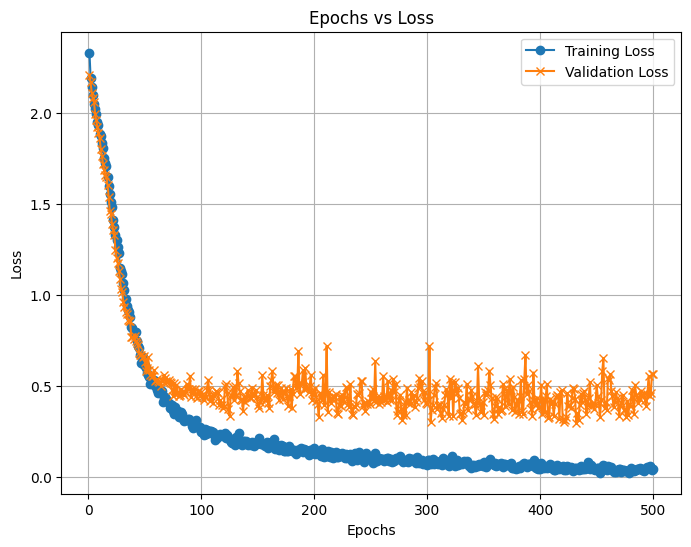

In [21]:
import matplotlib.pyplot as plt

# Extract loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot the losses
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='x')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


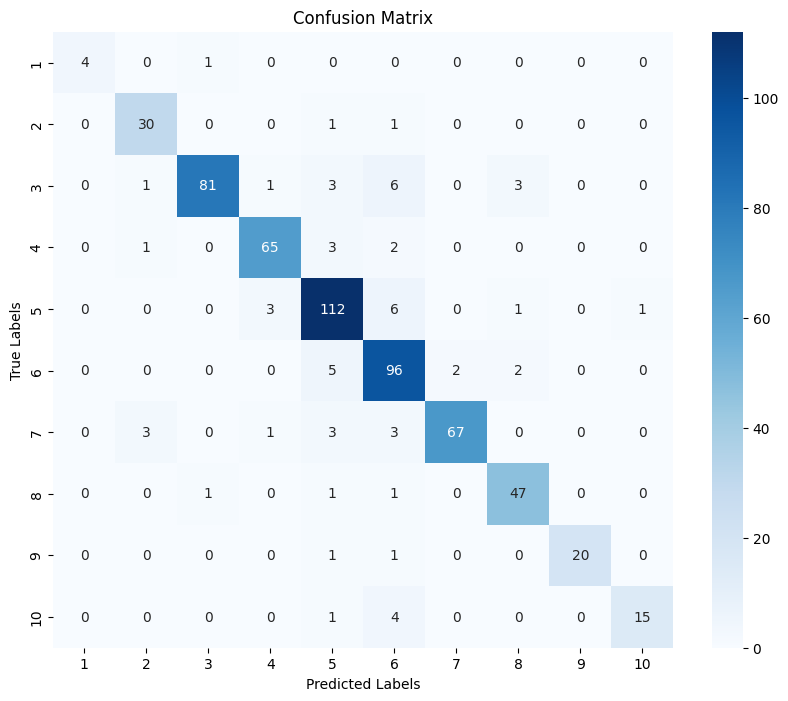

Classification Report:
              precision    recall  f1-score   support

     Class 1       1.00      0.80      0.89         5
     Class 2       0.86      0.94      0.90        32
     Class 3       0.98      0.85      0.91        95
     Class 4       0.93      0.92      0.92        71
     Class 5       0.86      0.91      0.89       123
     Class 6       0.80      0.91      0.85       105
     Class 7       0.97      0.87      0.92        77
     Class 8       0.89      0.94      0.91        50
     Class 9       1.00      0.91      0.95        22
    Class 10       0.94      0.75      0.83        20

    accuracy                           0.90       600
   macro avg       0.92      0.88      0.90       600
weighted avg       0.90      0.90      0.90       600



In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Convert predictions to class labels (assuming one-hot encoded labels)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 11), yticklabels=range(1, 11))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=[f'Class {i}' for i in range(1, 11)]))


In [90]:
y_test[3]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [91]:
y_pred[3]

array([9.8664477e-10, 5.6195324e-07, 2.3632630e-07, 1.0578398e-06,
       1.0906139e-06, 4.8719184e-10, 9.9999666e-01, 3.5322537e-07,
       6.9629690e-22, 1.8337969e-15], dtype=float32)

In [93]:
# Save the entire model to a file
model.save('Models/cnn_lstm.h5')
print("Model saved successfully!")

Model saved successfully!
